A notebook to compare standard LDA to Fisher LDA, investigating if they really are identical as claimed in Elements of Statistical Learning

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from janelia_core.ml.lda import fisher_lda

## Parameters go here

In [3]:
# Specify number of samples from each class (implicitly defining the number of classes)
n_smps = [100, 100, 100]

# Specify dimensionality of the space we are working in 
p = 5

## Generate data

In [4]:
# Randomly generate centers 
n_classes = len(n_smps)
ctrs = np.random.randn(n_classes,p)

# Generate samples for each class
class_data = [np.random.randn(n_smps[i],p) + ctrs[i,:] for i in range(n_classes)]
class_labels = [np.ones(n_smps[i])*i for i in range(n_classes)]

for data in class_data:
    data[:,1] = .15*data[:,1]

x = np.concatenate(class_data, axis=0)
y = np.concatenate(class_labels, axis=0)

## Run standard and fisher LDA and compare results

In [21]:
standard_lda = LinearDiscriminantAnalysis()
standard_lda.fit(x, y)
x_standard_transformed = [standard_lda.transform(data) for data in class_data]

w_lda = fisher_lda(x,y, use_cov=True)
x_fisher_transformed = [np.matmul(data, w_lda) for data in class_data]


x_standard_transformed_2 = [np.matmul(data - standard_lda.xbar_, standard_lda.scalings_) for data in class_data]




(-5.0, 5.0)

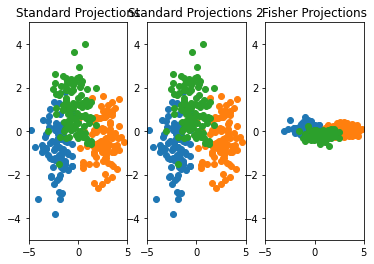

In [22]:
ax = plt.subplot(1,3,1)
for data in x_standard_transformed:
    plt.plot(data[:,0], data[:,1], 'o')
plt.title('Standard Projections')
plt.xlim([-5,5])
plt.ylim([-5,5])
#ax.axis('equal')

plt.subplot(1,3,2)
for data in x_standard_transformed_2:
    plt.plot(data[:,0], data[:,1], 'o')
#ax.axis('equal')
plt.title('Standard Projections 2')
plt.xlim([-5,5])
plt.ylim([-5,5])
#ax.axis('equal')

plt.subplot(1,3,3)
for data in x_fisher_transformed:
    plt.plot(data[:,1], -1*data[:,0], 'o')
#ax.axis('equal')
plt.title('Fisher Projections')
plt.xlim([-5,5])
plt.ylim([-5,5])
#ax.axis('equal')

In [11]:
np.sum(w_lda**2,axis=0)

array([1., 1.])

In [13]:
np.sum(w_lda[:,0]*w_lda[:,1])

-0.5469586997185539

In [24]:
sc = standard_lda.scalings_

In [26]:
sc[:,0]*sc[:,1]

array([-0.04519584, -4.05042651,  0.15078864, -0.07383333,  0.03815649])